## Tâche 8 : ph_bands
Objectif : calculer la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin.

In [1]:
import numpy as np
from pymatgen.phonon.plotter import PhononBSPlotter
from mp_api.client import MPRester
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# clé API Materials Project
mp_key = "hbfwQnxIfLcB2CMDIPBvWEJViltnasHl" # Clé API
mp_id = "mp-8145"  # Identifiant matériau

In [3]:
# Téléchargement de la structure du matériau
with MPRester(mp_key) as m:
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

### Structure des Bande de phonons et zone de Brillouin

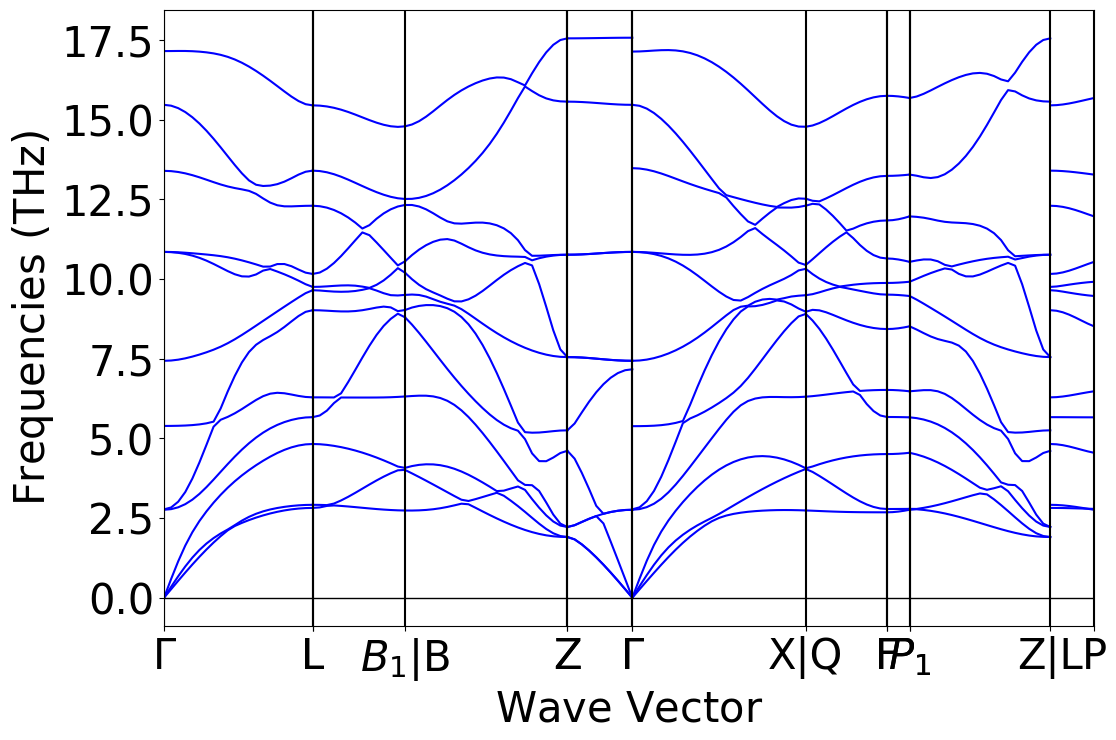

In [7]:
ph_plotter = PhononBSPlotter(ph_bs)
bs = ph_plotter.bs_plot_data()
ph_plotter.show()

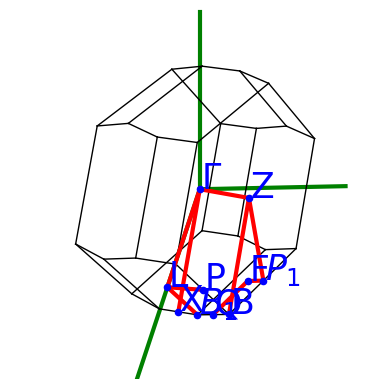

In [5]:
ph_Plotter.plot_brillouin()

In [17]:
G_dir = []
for i, (start, end) in enumerate(zip(bs["ticks"]["label"][:-1], bs["ticks"]["label"][1:])):
    if start == "$\Gamma$" or end == "$\Gamma$":
        G_dir.append((i, f"{start or '?'} → {end or '?'}"))

# Directions autour de Γ
for i, (idx, label) in enumerate(G_dir):
    print(f"{i}: {label}")

0: $\Gamma$ → L
1: Z → $\Gamma$
2: $\Gamma$ → $\Gamma$
3: $\Gamma$ → X|Q


On va étudier la vitesse du son pour les trois branches accoustiques différentes dans les trois directions $\Gamma - L, Z - \Gamma, \Gamma - X|Q$. On différencie les branches accoustiques des branches optiques car celles-ci ont leurs fréquences nulles au centre de la zone de Brillouin.

### Vitesse du son pour trois branches acoustiques différentes
La vitesse du son est calculée comme étant la pente de la relation de dispersion :
$$
v = \frac{dw}{dq} [m/s]
$$
où :  
- w est la fréquence angulaire ($= 2\pi f$)
- q est le vecteur d'onde,

Si on fait l'hypothèse d'une grande longeur d'onde (et donc d'une faible valeur de vecteur d'onde), cette relation est presque linéaire. Il faut alors effectuer une régression linéaire pour obtenir la pente et finalement trouver la vitesse du son.

In [27]:
def speed_sound(distances, frequencies, label):
    distances = np.array(distances[:4])
    frequencies = np.array(frequencies[:4])
    slope, _, _, _, _ = linregress(distances, frequencies)     # Régression linéaire pour obtenir la pente
    velocity = 2 * np.pi * np.abs(slope) * 100     # Conversion de l'unité THz/Å⁻¹ → m/s (facteur 2π * 100)
    print(f"Vitesse de propagation du son pour {label} : Vitesse = {velocity:.2f} m/s")
    return velocity

selected_gamma_indices = [0, 1, 3]    # Sélection des directions Γ
speed = {}

# Calcul de la vitesse du son pour chaque direction sélectionnée
for selection in selected_gamma_indices:
    idx, label = G_dir[selection]
    distances = bs["distances"][idx]
    frequencies = bs["frequency"][idx]
    print(f"\n--- Direction : {label} ---")
    for branch_index in range(3):
        branch_frequencies = [freq[branch_index] for freq in frequencies]
        velocity = speed_sound(distances, branch_frequencies, f"{label}, branche {branch_index+1}")
        speed[(label, branch_index+1)] = velocity


--- Direction : $\Gamma$ → L ---
Vitesse de propagation du son pour $\Gamma$ → L, branche 1 : Vitesse = 9627.22 m/s
Vitesse de propagation du son pour $\Gamma$ → L, branche 2 : Vitesse = 9048.58 m/s
Vitesse de propagation du son pour $\Gamma$ → L, branche 3 : Vitesse = 8590.90 m/s

--- Direction : Z → $\Gamma$ ---
Vitesse de propagation du son pour Z → $\Gamma$, branche 1 : Vitesse = 13047.10 m/s
Vitesse de propagation du son pour Z → $\Gamma$, branche 2 : Vitesse = 13322.09 m/s
Vitesse de propagation du son pour Z → $\Gamma$, branche 3 : Vitesse = 13676.16 m/s

--- Direction : $\Gamma$ → X|Q ---
Vitesse de propagation du son pour $\Gamma$ → X|Q, branche 1 : Vitesse = 12239.89 m/s
Vitesse de propagation du son pour $\Gamma$ → X|Q, branche 2 : Vitesse = 12036.91 m/s
Vitesse de propagation du son pour $\Gamma$ → X|Q, branche 3 : Vitesse = 11835.34 m/s
